In [2]:
from main import (
    gpt_playlist,
    youtube_to_mp3,
    tag_mp3,
    make_fun_fact,
    get_upcoming_song,
    sftp_upload,
)
from mutagen.easyid3 import EasyID3
from mutagen.mp3 import MP3
from mutagen.id3 import ID3
import pathlib

from pathlib import Path
from openai import OpenAI

import os
import subprocess

# Get OPENAI key from .env file
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
prompt = get_prompt()
prompt

'Give me a playlist of [NUM_TRACKS] [GENRE] songs. [DESCRIPTION].\nReturn each song on a new line with this format: "Artist - Song Title - Year". Don\'t include any list numbering, just the information I asked for in the format I indicated.'

In [3]:
import json

# Read the json from genre_prompts.json
with open("genre_prompts.json", "r") as file:
    genre_prompts = json.loads(file.read())["genres"]

genre_prompt = genre_prompts[-1]
genre_prompt

{'tag': 'Aspen Vibes',
 'description': 'A curated blend of soft rock, adult contemporary, and melodic pop hits in English. Perfect for relaxed listening with a nostalgic touch — the signature sound of Aspen 102.3.'}

In [ ]:
playlist = gpt_playlist(prompt, genre_prompt["tag"], 15, genre_prompt["description"])
playlist

[Song(artist='Gareth Emery', title='Sansa', year='2016'),
 Song(artist='Gareth Emery', title='Long Way Home', year='2014'),
 Song(artist='Seven Lions', title='First Time (feat. Dylan Matthew)', year='2018'),
 Song(artist='Above & Beyond', title='Hello', year='2018'),
 Song(artist='Chicane', title='Saltwater', year='1999'),
 Song(artist='Lane 8', title='Road', year='2020'),
 Song(artist='Ilan Bluestone', title='43', year='2015'),
 Song(artist='Porter Robinson', title='Flicker', year='2014'),
 Song(artist='Eric Prydz', title='Generate', year='2015'),
 Song(artist='Cosmic Gate', title='Exploration of Space', year='2000'),
 Song(artist='Audien', title='Wayfarer', year='2013'),
 Song(artist='Andrew Bayer', title='Once Lydian', year='2019'),
 Song(artist='EDX', title="Roadkill (EDX's Ibiza Sunrise Remix)", year='2008'),
 Song(artist='Marcus Schossow', title='Reverie', year='2013'),
 Song(artist='Yotto', title='Song From The Sun', year='2019')]

In [6]:
len(playlist)

30

In [10]:
for song in playlist:
    artist, title = song.split(" - ")
    print(f"Processing song: {artist} - {title}")
    # song_path = f"songs/{song}.mp3"
    song_path = pathlib.Path("songs") / f"{song}.mp3"
    if not song_path.exists():
        youtube_to_mp3(song, str(song_path))
        tag_mp3(song_path, artist, title)
        print(f"Downloaded and tagged: {artist} - {title}")
    else:
        print(f"Song already exists: {artist} - {title}")

Processing song: Queen - Bohemian Rhapsody
Song already exists: Queen - Bohemian Rhapsody
Processing song: Led Zeppelin - Stairway to Heaven
Song already exists: Led Zeppelin - Stairway to Heaven
Processing song: The Rolling Stones - Sympathy for the Devil
Downloaded: songs/The Rolling Stones - Sympathy for the Devil.mp3
Downloaded and tagged: The Rolling Stones - Sympathy for the Devil
Processing song: The Who - Baba O'Riley
Song already exists: The Who - Baba O'Riley
Processing song: Pink Floyd - Comfortably Numb
Song already exists: Pink Floyd - Comfortably Numb
Processing song: Lynyrd Skynyrd - Free Bird
Downloaded: songs/Lynyrd Skynyrd - Free Bird.mp3
Downloaded and tagged: Lynyrd Skynyrd - Free Bird
Processing song: AC/DC - Back in Black
Downloaded: songs/AC/DC - Back in Black.mp3
Downloaded and tagged: AC/DC - Back in Black
Processing song: The Eagles - Hotel California
Song already exists: The Eagles - Hotel California
Processing song: Aerosmith - Dream On
Song already exists: 

## Fun Fact

In [3]:
now_playing, upcoming = get_upcoming_song()

print(upcoming["song"]["text"])

fun_fact = make_fun_fact(upcoming["song"]["artist"], upcoming["song"]["title"])
print(fun_fact)

Prince - When Doves Cry
¿Sabías que "When Doves Cry" de Prince no tiene bajo? ¡Ese toque único la llevó a la cima de las listas en 1984!


## ReplayGain metadata

In [ ]:
def apply_replaygain_to_folder(folder_path):
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(".mp3"):
                full_path = os.path.join(root, file)
                print(f"Applying ReplayGain to: {full_path}")
                try:
                    audio = MP3(full_path)
                    if "RVA2:track" in audio.tags:
                        print(f"ReplayGain already present for: {full_path}, skipping.")
                        continue
                    subprocess.run(["mp3gain", "-r", "-k", full_path], check=True)
                except subprocess.CalledProcessError as e:
                    print(f"Error processing {file}: {e}")


# Example usage
# apply_replaygain_to_folder("songs")

## Text to Speech snippets

In [5]:
instruction_prompt = """Voice: The voice should be deep, velvety, and effortlessly cool, like a late-night jazz radio host.

Tone: The tone is smooth, laid-back, and inviting, creating a relaxed and easygoing atmosphere.

Personality: The delivery exudes confidence, charm, and a touch of playful sophistication, as if guiding the listener through a luxurious experience.

Pronunciation: Words should be drawn out slightly with a rhythmic, melodic quality, emphasizing key phrases with a silky flow.

Phrasing: Sentences should be fluid, conversational, and slightly poetic, with pauses that let the listener soak in the cool, jazzy vibe.

Accent: The accent should be that of Argentinian spanish."""

# speech = "Estás escuchando a Neural Cast: la radio que suena 24/7, generada por inteligencia artificial, elegida para vos. Música que piensa, pero que se siente."

In [6]:
neuralcast_snippets = [
    "Estás en NeuralCast: música elegida con inteligencia, pero pensada con cariño.",
    "Saluditos a Shaki, la novia bonita, y la reina de este pequeño universo radial. Gracias por la inspiración diaria.",
    "Esto no es Spotify. Esto es NeuralCast. Acá, cada tema tiene sentido.",
    "Si esta canción te mueve algo por dentro… misión cumplida.",
    "Desde el living de casa al rincón más sonoro de tu día. Esto es NeuralCast.",
    "Nuestra inteligencia artificial eligió esta canción, pero fue tu corazón el que la aprobó. Seguimos...",
    "¿Querías un algoritmo con gusto? Lo armamos en casa. Con auriculares y mate.",
    "Un abrazo radial a mi cómplice de todas las aventuras: Shaki. Esta también va para vos.",
    "¿Te suena? Bien. ¿No te suena? Mejor. Porque viniste a descubrir.",
    "NeuralCast: una radio local, para vos… y para nadie más.",
    "Bienvenidos a NeuralCast: donde las máquinas eligen, pero la emoción sigue siendo 100% humana.",
    "No somos una radio comercial, pero tenemos mejor gusto musical que muchas que sí lo son. Modestia aparte.",
    "Este tema suena bien porque fue elegido con inteligencia artificial... y porque vos estás del otro lado.",
    "Dicen que la música no se piensa, se siente. Bueno, nosotros hacemos ambas cosas. Bienvenidos a NeuralCast.",
    "Quizás no conozcas esta canción. Pero si te gusta, significa que estás exactamente donde tenías que estar.",
    "Shaki dice que a veces esta radio la hace llorar de emoción. Si eso no es un buen feedback, no sé qué lo es.",
    "Este es uno de esos momentos raros en que todo encaja: la canción, el ambiente, vos, nosotros...",
    "Transmitiendo desde un rincón del living, con café frío y mucho cariño. Esto es NeuralCast.",
    "Gracias por compartir este rato con nosotros. Aunque seamos solo bits y cables, se siente bastante humano.",
    "Oli... ¿todavía no estás durmiendo? Esta canción te la puse bajito, a ver si te ayuda con la siesta.",
    "Ey, Oli... prestá atención a este tema. Vas a crecer con buen gusto musical, lo prometo.",
    "Esta canción, Oli, algún día la vas a volver a escuchar y vas a sentir algo sin saber por qué. Es porque te la poníamos ahora.",
    "Oli, estás creciendo entre melodías. Que esta radio te acompañe mientras descubrís el mundo.",
    "Si estás despierto, Oli, esta va para vos. Y si estás dormido... mejor, porque papá por fin puede tomar un café caliente.",
    "Oli, no sabés leer esto todavía, pero te lo digo igual: este tema es un clásico. Confiá en papá.",
    "Estamos construyendo tus recuerdos sonoros, Oli. Y queremos que suenen bien.",
    "Oli, algún día vas a bailar con estas canciones… por ahora, con que no llores está bien.",
    "Esta canción tiene más años que vos, Oli. Pero tiene onda, como vos.",
    "Te estamos armando un soundtrack de vida, Oli. De a poquito, canción por canción.",
]

In [7]:
# Initialize OpenAI client
OPENAI_KEY = os.getenv("OPENAI_API_KEY")

client = OpenAI(api_key=OPENAI_KEY)

for idx, snippet in enumerate(neuralcast_snippets):
    speech_file_path = Path("speeches") / f"Snippet_{idx}.mp3"

    with client.audio.speech.with_streaming_response.create(
        model="gpt-4o-mini-tts",
        voice="ash",
        input=snippet,
        instructions=instruction_prompt,
    ) as response:
        response.stream_to_file(speech_file_path)
    print(f"Generated speech for snippet {idx}: {speech_file_path}")

Generated speech for snippet 0: speeches/Snippet_0.mp3
Generated speech for snippet 1: speeches/Snippet_1.mp3
Generated speech for snippet 2: speeches/Snippet_2.mp3
Generated speech for snippet 3: speeches/Snippet_3.mp3
Generated speech for snippet 4: speeches/Snippet_4.mp3
Generated speech for snippet 5: speeches/Snippet_5.mp3
Generated speech for snippet 6: speeches/Snippet_6.mp3
Generated speech for snippet 7: speeches/Snippet_7.mp3
Generated speech for snippet 8: speeches/Snippet_8.mp3
Generated speech for snippet 9: speeches/Snippet_9.mp3
Generated speech for snippet 10: speeches/Snippet_10.mp3
Generated speech for snippet 11: speeches/Snippet_11.mp3
Generated speech for snippet 12: speeches/Snippet_12.mp3
Generated speech for snippet 13: speeches/Snippet_13.mp3
Generated speech for snippet 14: speeches/Snippet_14.mp3
Generated speech for snippet 15: speeches/Snippet_15.mp3
Generated speech for snippet 16: speeches/Snippet_16.mp3
Generated speech for snippet 17: speeches/Snippet_1

### Test Validation

In [8]:
from validators import spotify_ok, mb_ok, itunes_ok, verified

# Example test cases
artist = "Meta Guacha"
title = "La Cumbia de los Trapos"

print("Spotify OK:", spotify_ok(artist, title))
print("MusicBrainz OK:", mb_ok(artist, title))
print("iTunes OK:", itunes_ok(artist, title))
print("Any verified:", verified(artist, title))

Spotify OK: True
MusicBrainz OK: False
iTunes OK: False
Any verified: True


## Playlists

In [3]:
import pandas as pd

# Load the CSV file
classic_rock_path = pathlib.Path("playlists") / "ClassicRock.csv"
classic_rock_df = pd.read_csv(classic_rock_path)

# Check for duplicates
duplicates = classic_rock_df[classic_rock_df.duplicated()]
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicates found.")

# Remove duplicates, keeping the first occurrence
classic_rock_df = classic_rock_df.drop_duplicates()

# Sort by Artist name (assuming the column is named 'Artist')
classic_rock_df = classic_rock_df.sort_values(by="Artist")
classic_rock_df

No duplicates found.


,Artist,Title,Year
125,AC/DC,Stiff Upper Lip,2000
70,AC/DC,Back in Black,1980
55,AC/DC,Highway to Hell,1979
60,Aerosmith,Walk This Way,1975
76,Aerosmith,Dude (Looks Like a Lady),1987
...,...,...,...
174,U2,Sunday Bloody Sunday,1983
64,Van Halen,Runnin' with the Devil,1978
8,Vanilla Fudge,You Keep Me Hangin' On,1967
117,Weezer,Say It Ain't So,1994


In [4]:
# Save the cleaned and sorted dataframe back to CSV
classic_rock_df.to_csv(classic_rock_path, index=False)

## Album artwork download

In [ ]:
import musicbrainzngs
import requests
from mutagen.id3 import APIC, ID3, ID3NoHeaderError
from mutagen.easyid3 import EasyID3
import datetime

# Set up musicbrainzngs library
musicbrainzngs.set_useragent(
    "NeuralCastArtEmbedder", "1.0", "https://github.com/your-repo"
)


def _parse_release_date(date_str: str) -> datetime.datetime:
    try:
        return datetime.datetime.strptime(date_str, "%Y-%m-%d")
    except ValueError:
        try:
            return datetime.datetime.strptime(date_str, "%Y-%m")
        except ValueError:
            try:
                return datetime.datetime.strptime(date_str, "%Y")
            except ValueError:
                return datetime.datetime.max


def find_best_release(recordings):
    """
    Finds the best release from a list of recordings.
    Prioritizes the earliest, official album release.
    """
    candidate_releases = []

    for recording in recordings:
        if "release-list" in recording:
            for release in recording["release-list"]:
                if (
                    release.get("status") == "Official"
                    and "date" in release
                    and release.get("release-group", {}).get("primary-type") == "Album"
                ):
                    candidate_releases.append(release)

    if not candidate_releases:
        return None

    candidate_releases.sort(key=lambda r: _parse_release_date(r.get("date", "")))
    return candidate_releases[0]


def find_best_release_from_releases(releases):
    """
    Finds the best release from a list of releases (result of search_releases).
    Prioritizes the earliest, official album release.
    """
    candidate_releases = []
    for release in releases:
        if (
            release.get("status") == "Official"
            and release.get("release-group", {}).get("primary-type") == "Album"
            and "date" in release
        ):
            candidate_releases.append(release)

    if not candidate_releases:
        return None

    candidate_releases.sort(key=lambda r: _parse_release_date(r.get("date", "")))
    return candidate_releases[0]


def _download_cover_art(release_id: str):
    art_url = f"https://coverartarchive.org/release/{release_id}/front"
    response = requests.get(art_url, allow_redirects=True, timeout=10)
    response.raise_for_status()
    image_data = response.content
    mime_type = response.headers.get("Content-Type", "image/jpeg")
    return image_data, mime_type, art_url


def _embed_image(mp3_path: str, image_data: bytes, mime_type: str):
    try:
        audio = ID3(mp3_path)
    except ID3NoHeaderError:
        audio = ID3()
    audio.delall("APIC")
    audio.add(APIC(encoding=3, mime=mime_type, type=3, desc="Cover", data=image_data))
    audio.save(mp3_path)


def embed_from_release_id(
    mp3_path: str, release_id: str, release_title: str | None = None
):
    try:
        image_data, mime_type, art_url = _download_cover_art(release_id)
        print(f"-> Successfully downloaded cover art from {art_url}")
        _embed_image(mp3_path, image_data, mime_type)
        if release_title:
            print(
                f"-> Successfully embedded artwork into '{mp3_path}' (Release: '{release_title}')"
            )
        else:
            print(f"-> Successfully embedded artwork into '{mp3_path}'")
    except requests.exceptions.RequestException as e:
        print(f"-> Failed to download cover art: {e}")
    except Exception as e:
        print(f"-> An unexpected error occurred while embedding from release id: {e}")


def embed_from_artist_album(mp3_path: str, artist: str, album: str):
    """
    Uses artist + album to find the best release and embed its cover.
    """
    print(f"Searching for album '{album}' by '{artist}' on MusicBrainz...")
    try:
        result = musicbrainzngs.search_releases(artist=artist, release=album, limit=10)
        releases = result.get("release-list", [])
        if not releases:
            print("-> No releases found for given artist and album.")
            return

        release = find_best_release_from_releases(releases) or releases[0]
        release_id = release["id"]
        print(f"-> Found release: '{release.get('title', album)}' (ID: {release_id})")
        embed_from_release_id(mp3_path, release_id, release.get("title", album))
    except musicbrainzngs.WebServiceError as exc:
        print(f"-> MusicBrainz API error: {exc}")
    except Exception as e:
        print(f"-> An unexpected error occurred: {e}")


def embed_from_artist_title(mp3_path: str, artist: str, title: str):
    """
    Finds and embeds album art for an MP3 file given the artist and title.
    """
    print(f"Searching for '{title}' by '{artist}' on MusicBrainz...")
    try:
        result = musicbrainzngs.search_recordings(
            artist=artist, recording=title, limit=5
        )
        if not result["recording-list"]:
            print("-> No recordings found.")
            return

        release = find_best_release(result["recording-list"])

        if not release:
            print("-> No suitable official album release found.")
            if "release-list" in result["recording-list"][0]:
                release = result["recording-list"][0]["release-list"][0]
            else:
                print("-> No associated releases found for the top recording.")
                return

        release_id = release["id"]
        print(f"-> Found release: '{release['title']}' (ID: {release_id})")
        embed_from_release_id(mp3_path, release_id, release.get("title"))
    except musicbrainzngs.WebServiceError as exc:
        print(f"-> MusicBrainz API error: {exc}")
    except Exception as e:
        print(f"-> An unexpected error occurred: {e}")


def _get_musicbrainz_album_id_from_tags(mp3_path: str) -> str | None:
    """
    Tries to extract the MusicBrainz Album ID from ID3 tags (TXXX frames or EasyID3).
    """
    mbid = None
    try:
        tags = EasyID3(mp3_path)
        mbid = tags.get("musicbrainz_albumid", [None])[0]
    except Exception:
        pass

    if mbid:
        return mbid

    # Fallback: inspect raw ID3 TXXX frames
    try:
        id3 = ID3(mp3_path)
        for frame in id3.getall("TXXX"):
            desc = getattr(frame, "desc", "") or ""
            if desc.lower() in ("musicbrainz album id", "musicbrainz_albumid"):
                values = getattr(frame, "text", [])
                if values:
                    return values[0]
    except Exception:
        pass

    return None


def embed_artwork_from_tags(mp3_path: str):
    """
    Reads tags from an MP3 and embeds album art.
    Priority:
    1) If MusicBrainz Album ID exists in tags, use it and skip MusicBrainz search.
    2) Else if Album tag exists, search by artist + album.
    3) Else fallback to search by artist + title.
    """
    try:
        tags = EasyID3(mp3_path)
        artist = tags.get("artist", [None])[0]
        title = tags.get("title", [None])[0]
        album = tags.get("album", [None])[0]

        if not artist:
            print(f"Artist tag missing in '{mp3_path}'. Cannot proceed.")
            return

        # 1) Use MusicBrainz Album ID from tags if present
        mb_album_id = _get_musicbrainz_album_id_from_tags(mp3_path)
        if mb_album_id:
            print(
                f"Found MusicBrainz Album ID in tags: {mb_album_id} -> skipping search."
            )
            embed_from_release_id(mp3_path, mb_album_id, album or None)
            return

        # 2) Use album tag if present (search releases by artist + album)
        if album:
            embed_from_artist_album(mp3_path, artist, album)
            return

        # 3) Fallback to artist + title
        if title:
            embed_from_artist_title(mp3_path, artist, title)
        else:
            print(f"Title tag missing in '{mp3_path}'. Cannot proceed.")

    except Exception as e:
        print(f"Error reading tags from {mp3_path}: {e}")

In [27]:
import tempfile
from IPython.display import Image as IPyImage, display


def show_embedded_art(mp3_path: str):
    """Display the embedded cover art (preferring front cover) for the given MP3."""
    print(f"[show] Loading ID3 from: {mp3_path}")
    try:
        id3 = ID3(mp3_path)
    except ID3NoHeaderError:
        print("[show] No ID3 tags found.")
        return None

    apics = id3.getall("APIC")
    print(f"[show] Found {len(apics)} APIC frame(s).")
    if not apics:
        print("[show] No embedded artwork found.")
        return None

    apic = next((a for a in apics if getattr(a, "type", None) == 3), apics[0])
    mime = apic.mime or _sniff_mime(apic.data)
    print(f"[show] Selected APIC type={getattr(apic, 'type', None)}, MIME={mime}")

    try:
        fmt = "png" if "png" in (mime or "").lower() else "jpeg"
        print(f"[show] Displaying image inline (format={fmt})...")
        display(IPyImage(data=apic.data, format=fmt))
    except Exception as e:
        print(f"[show] Inline display failed ({e}); writing to a temp file...")
        ext = "png" if "png" in (mime or "").lower() else "jpg"
        fd, path = tempfile.mkstemp(suffix=f".{ext}")
        with os.fdopen(fd, "wb") as f:
            f.write(apic.data)
        print(f"Saved embedded art to: {path}")

    return mime

In [28]:
mp3 = "NeuralCast/songs/Classic Rock/U2 - With or Without You.mp3"

[show] Loading ID3 from: NeuralCast/songs/Classic Rock/U2 - With or Without You.mp3
[show] Found 1 APIC frame(s).
[show] Selected APIC type=PictureType.COVER_FRONT, MIME=image/jpeg
[show] Displaying image inline (format=jpeg)...


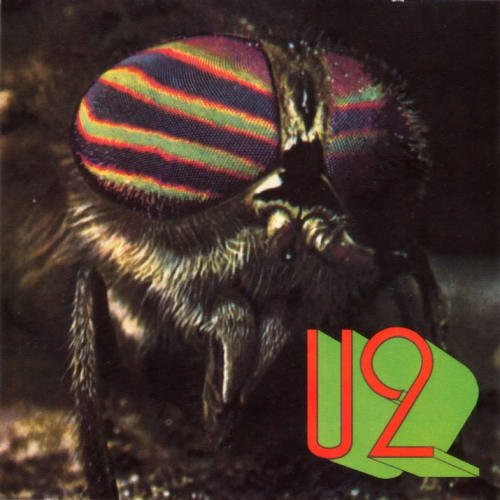

'image/jpeg'

In [30]:
show_embedded_art(mp3)

In [31]:
embed_artwork_from_tags(mp3)

Searching for 'With or Without You' by 'U2' on MusicBrainz...
-> No suitable official album release found.
-> Found release: 'The Eye of the Fly' (ID: 70a6f1cc-ea8d-4356-bf70-131dca943c17)
-> Successfully downloaded cover art from https://coverartarchive.org/release/70a6f1cc-ea8d-4356-bf70-131dca943c17/front
-> Successfully embedded artwork into 'NeuralCast/songs/Classic Rock/U2 - With or Without You.mp3'


[show] Loading ID3 from: NeuralCast/songs/Classic Rock/U2 - With or Without You.mp3
[show] Found 1 APIC frame(s).
[show] Selected APIC type=PictureType.COVER_FRONT, MIME=image/jpeg
[show] Displaying image inline (format=jpeg)...


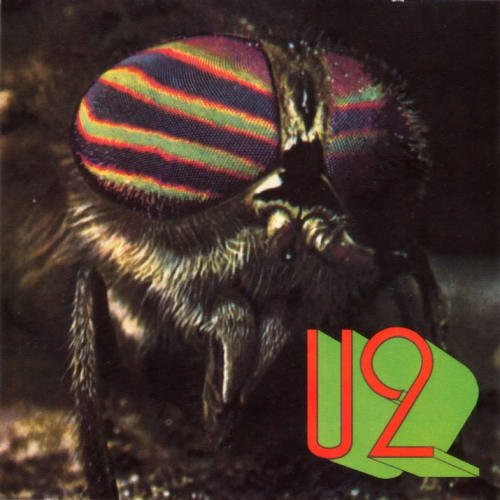

'image/jpeg'

In [32]:
show_embedded_art(mp3)